In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sc

In [2]:
def dx(x,i,ron,u,d,dt):
    'finds the change in the bounday position for a given time step dt'
    k = u*ron/(d**2)
    dum = k*x*(1-x)*(i)*dt
    return dum

def voltage_controlled(ron,roff,i,x):
    'finds vout'
    dum = roff*i
    dum1= (ron-roff)*x*i
    return (dum+dum1)



In [3]:
x=0.1 #inital bounday position 
ron=10e3 #memristor low resistance
roff=100e3 #memrsitor high resistance
u=1e-14 #ion drift mobility 
d=27e-9 #memristor lenght 
#i = np.arange(0,10.01,0.01) #current range
#i=np.sin(i)*1e-5 #sin current range
t = np.linspace(0,10,100) #time array the same length as the current array 
f=0.1
i = np.sin(2*np.pi*t*f) *1e-5

In [4]:
test=[] #empty array for testing the functions
x_pos = [] #empty array for the boundary position 
for j in range(len(t)):  #for loop with one element for every element in the time array
    if j != 0: #if the j'th itteration is not the first
        dt = (t[j]-t[j-1]) #find the time step between this point and the last
        change = dx(x,i[j],ron,u,d,dt) #calcualte how much the boundary positon will move
        x = x+ change #calculates the new boundary postion 
        x_pos.append(x) #adds this to the position array for later use
        dum = voltage_controlled(ron,roff,i[j],x) #calculates the instantanious voltage across the memristor 
        test.append(dum) #adds this voltage to the array 
    else: #if it is the first time step
        dum = voltage_controlled(ron,roff,i[j],x)  #finds the voltage accorss the memristor
        test.append(dum) #adds this the first point in the array 
        x_pos.append(x) #adds the inital position to the position array

Here I wanted to see the voltage over time, so I have made the plot below

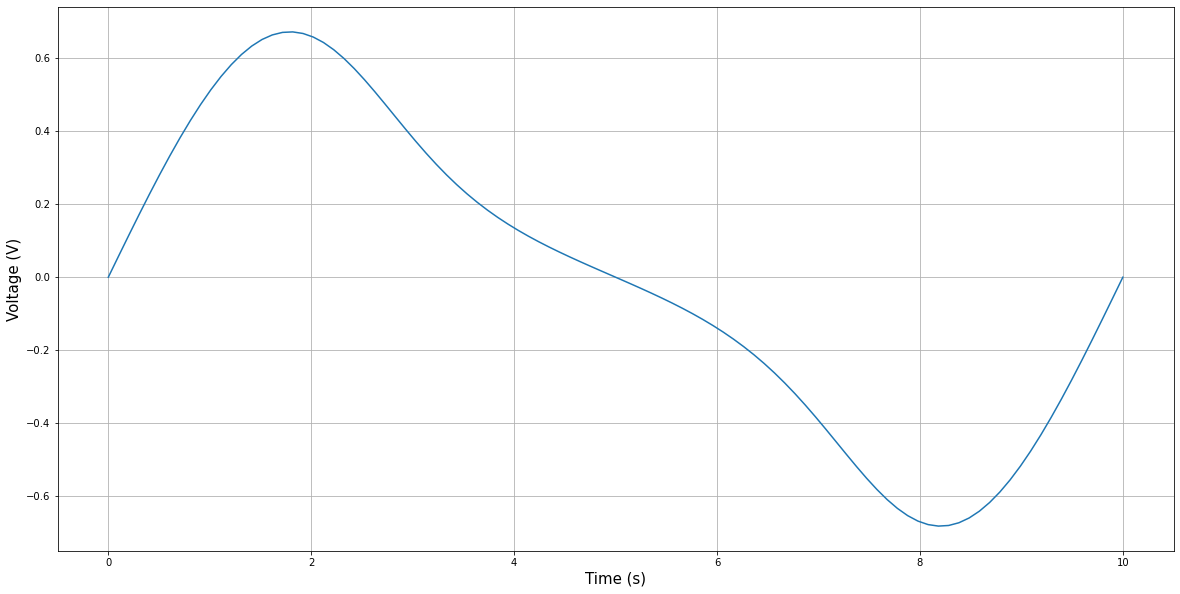

In [5]:
plt.figure(figsize=(20,10))
plt.plot(t,test)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Voltage (V)',fontsize=15)
plt.grid()
plt.show()

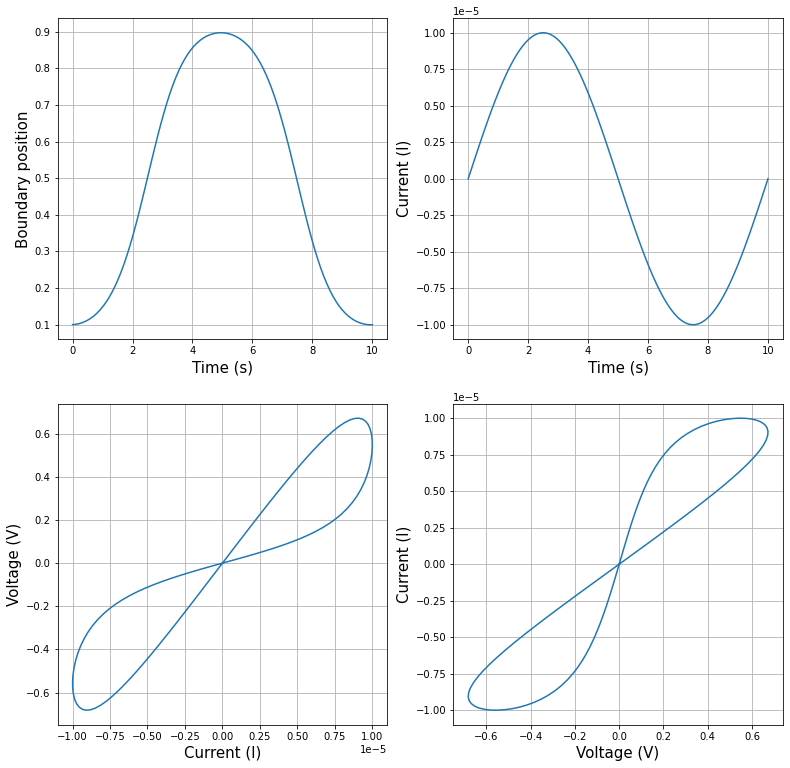

In [6]:
plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
plt.plot(t,x_pos)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Boundary position',fontsize=15)
plt.grid()
plt.subplot(2,2,2)
plt.plot(t,i)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.subplot(2,2,3)
plt.plot(i,test)
plt.xlabel('Current (I)',fontsize=15)
plt.ylabel('Voltage (V)',fontsize=15)
plt.grid()
plt.subplot(2,2,4)
plt.plot(test,i)
plt.ylabel('Current (I)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()
plt.show()

In [7]:
x=0.1 #inital bounday position 
ron=10e3 #memristor low resistance
roff=100e3 #memrsitor high resistance
u=1e-14 #ion drift mobility 
d=27e-9 #memristor lenght 
#i = np.arange(0,10.01,0.01) #current range
#i=np.sin(i)*1e-5 #sin current range
t = np.linspace(0,10,100) #time array the same length as the current array 
f=0.1
i = np.sin(2*np.pi*t*f) *1e-5

def dx(x,i,ron,u,d,dt):
    'finds the change in the bounday position for a given time step dt'
    k = u*ron/(d**2)
    dum = k*x*(1-x)*(i)*dt
    return dum

def voltage_controlled(ron,roff,i,x):
    'finds vout'
    dum = roff*i
    dum1= (ron-roff)*x*i
    return (dum+dum1)
test=[] #empty array for testing the functions
x_pos = [] #empty array for the boundary position 
for j in range(len(t)):  #for loop with one element for every element in the time array
    if j != 0: #if the j'th itteration is not the first
        dt = (t[j]-t[j-1]) #find the time step between this point and the last
        change = dx(x,i[j],ron,u,d,dt) #calcualte how much the boundary positon will move
        x = x+ change #calculates the new boundary postion 
        x_pos.append(x) #adds this to the position array for later use
        dum = voltage_controlled(ron,roff,i[j],x) #calculates the instantanious voltage across the memristor 
        test.append(dum) #adds this voltage to the array 
    else: #if it is the first time step
        dum = voltage_controlled(ron,roff,i[j],x)  #finds the voltage accorss the memristor
        test.append(dum) #adds this the first point in the array 
        x_pos.append(x) #adds the inital position to the position array

In [8]:
def basic_memristor(i,t,ron,roff,u,d,x):
    'basic model for a memristor, input a time and current array with inital conditions and paramater to get voltage out'
    
    def dx(x,i,ron,u,d,dt):
        'finds the change in the boundary postiton after a time dt'
        k = u*ron/(d**2)
        dum = k*x*(1-x)*(i)*dt
        return dum
    def volts(ron,roff,i,x):
        'finds the voltage'
        dum=roff*i
        dum1=(ron-roff)*x*i
        return (dum+dum1)
    out = []
    for j in range(len(t)):
        if j!=0:
            dt=(t[j]-t[j-1])
            change = dx(x,i[j],ron,u,d,dt)
            x=x+change
            out.append(volts(ron,roff,i[j],x))
        else:
            out.append(volts(ron,roff,i[j],x))
    return(out)

In [31]:
t=np.linspace(0,10,1000)
f=100000
i=np.sin(2*np.pi*f*t)*1e-4
x=0.05
ron=10e3 
roff=100e3 
u=1e-14 
d=27e-9 
v=basic_memristor(i,t,ron,roff,u,d,x)

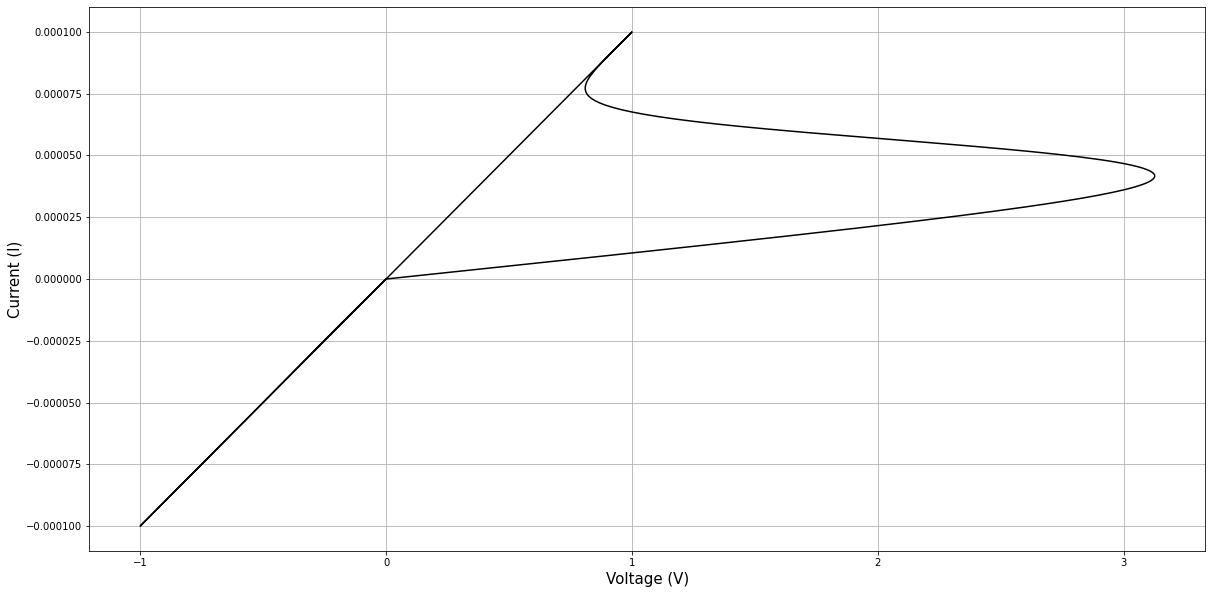

In [32]:
plt.figure(figsize=(20,10))
plt.plot(v,i,color='black')
plt.ylabel('Current (I)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()
plt.show()

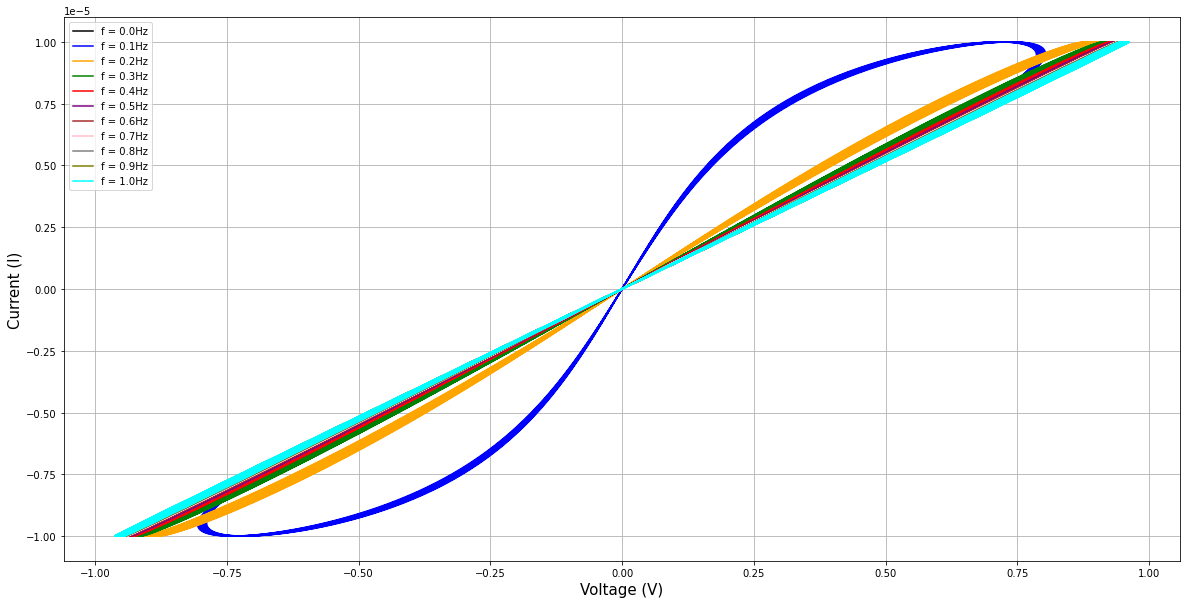

In [17]:
colors=['black','blue','orange','green','red','purple','brown','pink','gray','olive','cyan']

testf=np.arange(0,1.1,0.1)
testi=[]
testv=[]
plt.figure(figsize=(20,10))
for i in range(len(testf)):
    testi.append(np.sin(2*np.pi*testf[i]*t)*1e-5)
    testv.append(basic_memristor(testi[i],t,ron,roff,u,d,x))
    plt.plot(testv[i],testi[i],color=colors[i],label='f = '+str(round(testf[i],1))+'Hz')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
#plt.ylim(2e-5,-2e-5)
plt.legend()
plt.grid()
plt.show()

In [18]:
def SPICEfileReader (filetoread,columns):
    'reads LTSpice files, needs '' over the file name and the number of columns in the file'
    f=open(filetoread,'r')#opens the file
    dum = f.readlines()[1:]#reads the data, but skips the first line as they are column titles 
    f.close()#closes the file
    data=[]#empty array for the data later
    for i in dum: #goes through all the data
        dum1=i.split('\t')#splits the data at every column, making rows
        for j in dum1:#goes through each of these rows
            data.append(float(j.split('\n')[0]))#splits the data at the end point, and gets rid of the new row command from the data
    rows=int(len(data)/columns)#caluclates how many rows there are
    out=np.reshape(data,(rows,columns))#re-shapes the data into a useable format
    return(out)#returns the data

data=SPICEfileReader('HP memristor 1s data.txt',3)

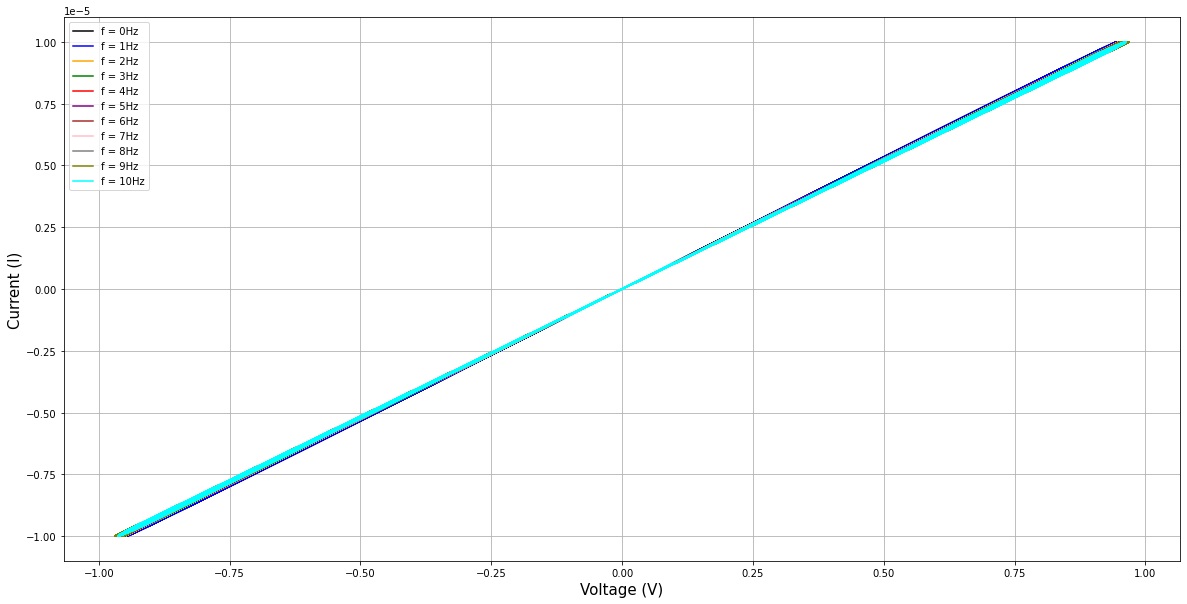

In [22]:
colors=['black','blue','orange','green','red','purple','brown','pink','gray','olive','cyan']

testf=np.arange(0,11,1)
testi=[]
testv=[]
plt.figure(figsize=(20,10))
for i in range(len(testf)):
    testi.append(np.sin(2*np.pi*testf[i]*t)*1e-5)
    testv.append(basic_memristor(testi[i],t,ron,roff,u,d,x))
    plt.plot(testv[i],testi[i],color=colors[i],label='f = '+str(round(testf[i],1))+'Hz')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
#plt.ylim(2e-5,-2e-5)
plt.legend()
plt.grid()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10000,) and (1,)

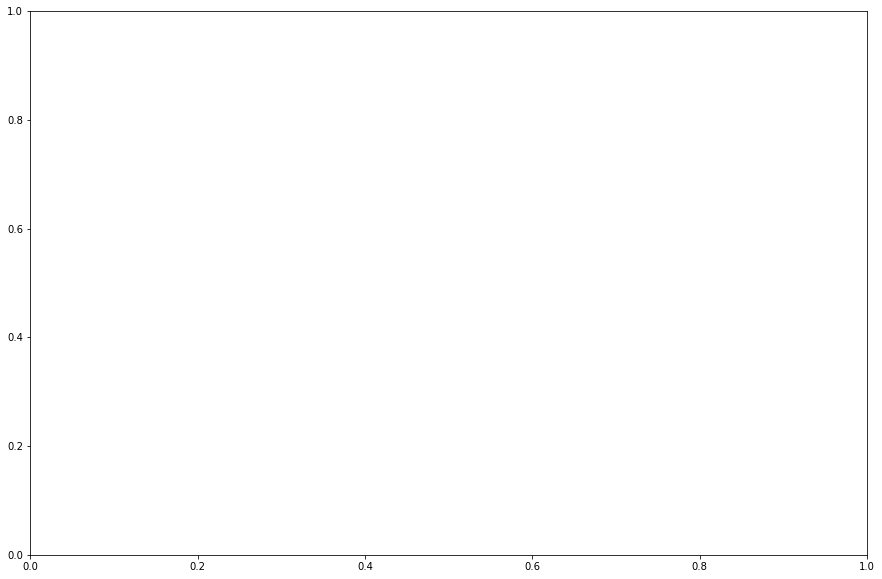

In [19]:
plt.figure(figsize=(15,10))
plt.plot(v,i,color='black',label='Python Model',linewidth=5)
plt.plot(data[:,1],data[:,2],color='red',linestyle='--',label='SPICE model',linewidth=5)
plt.ylabel('Current (I)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()

leg = plt.legend()

leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines[0], linewidth=2)
plt.setp(leg_lines[1], linewidth=2)
plt.setp(leg_texts, fontsize=15)

plt.show() 




plt.show()